In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
datacsv = pd.read_csv('29dataset_dropped_opt.csv', index_col=0)

In [3]:
df = pd.DataFrame(data = datacsv)
df

,E(RB3LYP),Dipole Moment,Polarizability (a),Zero-point Energy Correction,C=O stretch\nFrequency,C=O stretch\nRaman Activity,C=O stretch\nDepolar-P,C2-H stretch\nFrequency,C2-H stretch\nDepolar-P,O NBO Charge,...,L,B1,B5,LUMO(chk),HOMO(chk),X=O(ONBO),X=O(CNBO),"C Length(X=O,CHO)",A_para,B_para
M1,-384.890280,2.976386,82.320667,0.138206,1792.56,67.2699,0.3176,2895.10,0.2969,-0.536,...,6.75,1.76,4.33,0.01238,-0.24837,0.000,0.000,0.00000,0.74,0.31
M2,-384.891819,3.393730,82.941333,0.137724,1799.19,82.1492,0.3278,2905.37,0.3060,-0.531,...,6.75,1.76,4.40,0.01381,-0.24819,0.000,0.000,0.00000,0.78,0.39
M3,-384.892348,3.780420,84.218000,0.137661,1797.59,103.3745,0.3431,2903.04,0.3077,-0.533,...,7.70,1.81,3.16,0.01495,-0.25054,0.000,0.000,0.00000,0.79,0.36
M4,-460.095229,4.813919,87.394333,0.143198,1782.58,82.3785,0.2987,2995.61,0.2999,-0.541,...,6.76,1.75,5.37,0.02047,-0.24760,0.000,0.000,0.00000,0.98,0.49
M5,-460.097202,2.178176,87.727333,0.143040,1796.18,87.0887,0.3267,2913.73,0.3037,-0.533,...,6.75,1.75,5.35,0.01238,-0.25296,0.000,0.000,0.00000,0.73,0.42
M6,-460.098685,4.988572,90.681000,0.143103,1792.93,139.4349,0.3464,2896.49,0.3137,-0.540,...,8.85,1.78,3.18,0.01690,-0.25130,0.000,0.000,0.00000,0.84,0.29
M7,-2916.675203,3.248754,88.329333,0.100233,1791.24,61.3724,0.2859,3000.48,0.2480,-0.525,...,6.78,1.78,4.86,-0.00043,-0.26416,0.000,0.000,0.00000,0.73,0.53
M8,-2916.676864,1.869718,89.644000,0.100118,1804.15,84.9797,0.3394,2918.78,0.3033,-0.521,...,6.86,1.77,4.83,-0.00168,-0.26249,0.000,0.000,0.00000,0.76,0.62
M9,-2916.677538,2.065982,91.846667,0.100110,1800.83,146.4000,0.3339,2913.59,0.2997,-0.525,...,8.51,1.95,3.16,-0.00253,-0.26684,0.000,0.000,0.00000,0.89,0.56
M10,-424.203430,2.994698,94.245667,0.166295,1778.72,64.2892,0.2735,2962.69,0.3055,-0.540,...,6.81,1.88,5.60,-0.06031,-0.24371,0.000,0.000,0.00000,0.98,0.28


In [4]:
df2 = df.drop('M8')
df3 = df2.drop('M18')
df4 = df3.drop('M1')
df4

,E(RB3LYP),Dipole Moment,Polarizability (a),Zero-point Energy Correction,C=O stretch\nFrequency,C=O stretch\nRaman Activity,C=O stretch\nDepolar-P,C2-H stretch\nFrequency,C2-H stretch\nDepolar-P,O NBO Charge,...,L,B1,B5,LUMO(chk),HOMO(chk),X=O(ONBO),X=O(CNBO),"C Length(X=O,CHO)",A_para,B_para
M2,-384.891819,3.393730,82.941333,0.137724,1799.19,82.1492,0.3278,2905.37,0.3060,-0.531,...,6.75,1.76,4.40,0.01381,-0.24819,0.000,0.000,0.00000,0.78,0.39
M3,-384.892348,3.780420,84.218000,0.137661,1797.59,103.3745,0.3431,2903.04,0.3077,-0.533,...,7.70,1.81,3.16,0.01495,-0.25054,0.000,0.000,0.00000,0.79,0.36
M4,-460.095229,4.813919,87.394333,0.143198,1782.58,82.3785,0.2987,2995.61,0.2999,-0.541,...,6.76,1.75,5.37,0.02047,-0.24760,0.000,0.000,0.00000,0.98,0.49
M5,-460.097202,2.178176,87.727333,0.143040,1796.18,87.0887,0.3267,2913.73,0.3037,-0.533,...,6.75,1.75,5.35,0.01238,-0.25296,0.000,0.000,0.00000,0.73,0.42
M6,-460.098685,4.988572,90.681000,0.143103,1792.93,139.4349,0.3464,2896.49,0.3137,-0.540,...,8.85,1.78,3.18,0.01690,-0.25130,0.000,0.000,0.00000,0.84,0.29
M7,-2916.675203,3.248754,88.329333,0.100233,1791.24,61.3724,0.2859,3000.48,0.2480,-0.525,...,6.78,1.78,4.86,-0.00043,-0.26416,0.000,0.000,0.00000,0.73,0.53
M9,-2916.677538,2.065982,91.846667,0.100110,1800.83,146.4000,0.3339,2913.59,0.2997,-0.525,...,8.51,1.95,3.16,-0.00253,-0.26684,0.000,0.000,0.00000,0.89,0.56
M10,-424.203430,2.994698,94.245667,0.166295,1778.72,64.2892,0.2735,2962.69,0.3055,-0.540,...,6.81,1.88,5.60,-0.06031,-0.24371,0.000,0.000,0.00000,0.98,0.28
M11,-479.545271,6.320322,111.650667,0.183685,1784.17,214.4432,0.3475,2886.74,0.3263,-0.552,...,8.89,1.89,3.17,0.02576,-0.23705,0.000,0.000,0.00000,0.70,0.08
M12,-349.196145,2.728833,72.717333,0.180130,1827.81,12.6543,0.4832,2877.41,0.3475,-0.529,...,6.68,1.93,3.52,0.01421,-0.26174,0.000,0.000,0.00000,0.68,0.24


In [5]:
X_train = df4.iloc[:26,:19].values  # 説明変数
y_train = df4.iloc[:26,19].values   # 目的変数

In [6]:
A8 =df.iloc[7,0:]
A18 =df.iloc[17,0:]
A1 =df.iloc[0,0:]

In [7]:
testframe = pd.DataFrame(data = (A8,A18,A1))

In [8]:
X_test = testframe.iloc[0:3,:19]
y_test = testframe.iloc[0:3,19]

In [9]:
print(X_test)
print(X_train)

       E(RB3LYP)  Dipole Moment  Polarizability (a)  \
M8  -2916.676864       1.869718           89.644000   
M18 -1264.748798       4.137538           93.296667   
M1   -384.890280       2.976386           82.320667   

     Zero-point Energy Correction  C=O stretch\nFrequency  \
M8                       0.100118                 1804.15   
M18                      0.090566                 1802.42   
M1                       0.138206                 1792.56   

     C=O stretch\nRaman Activity  C=O stretch\nDepolar-P  \
M8                       84.9797                  0.3394   
M18                      54.6829                  0.2500   
M1                       67.2699                  0.3176   

     C2-H stretch\nFrequency  C2-H stretch\nDepolar-P  O NBO Charge  \
M8                   2918.78                   0.3033        -0.521   
M18                  3015.69                   0.2694        -0.501   
M1                   2895.10                   0.2969        -0.536   

     C2-

In [10]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(X_train)
X_train_st_lasso = standard.transform(X_train)
X_test_st_lasso = standard.transform(X_test)

X_train_st_lasso_df=pd.DataFrame(X_train_st_lasso)
print(X_train_st_lasso_df)

          0         1         2         3         4         5         6   \
0   0.478488  0.012947 -0.591036 -0.513696 -0.154706  0.189374 -0.341979   
1   0.478487  0.336366 -0.538426 -0.514757 -0.239098  0.618846 -0.192699   
2   0.363455  1.200761 -0.407532 -0.421481 -1.030803  0.194014 -0.625905   
3   0.363452 -1.003714 -0.393809 -0.424143 -0.313468  0.289320 -0.352712   
4   0.363450  1.346837 -0.272090 -0.423082 -0.484890  1.348491 -0.160501   
5  -3.394175 -0.108307 -0.369001 -1.145267 -0.574030 -0.231022 -0.750793   
6  -3.394179 -1.097551 -0.224054 -1.147339 -0.068204  1.489423 -0.282462   
7   0.418356 -0.320794 -0.125193 -0.032391 -1.234399 -0.172004 -0.871779   
8   0.333704  2.460682  0.592054  0.260560 -0.946938  2.866206 -0.149768   
9   0.533088 -0.543157 -1.012360  0.200673  1.354861 -1.216783  1.174242   
10  0.023093 -1.564003 -0.609100 -0.897143  0.133810  0.191837 -0.191723   
11  0.190065  0.299072  0.216171 -0.275713 -0.215363  1.103438 -0.203431   
12  0.514101

In [11]:
lasso = Lasso(alpha=0.01,random_state=0)
lasso_train = lasso.fit(X_train_st_lasso, y_train)

In [12]:
from sklearn.metrics import r2_score

y_pred_lasso_train = lasso_train.predict(X_train_st_lasso)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

print(y_pred_lasso_train)

y_pred_lasso_test = lasso_train.predict(X_test_st_lasso)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))

print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)
print(lasso_train.coef_, lasso_train.intercept_)

[0.74814783 0.76324049 0.75438462 0.76271079 0.7815639  0.82768947
 0.82331032 0.79849271 0.77761494 0.70964721 0.79692483 0.7146379
 0.77348012 0.80526093 0.80485518 0.76258568 0.75588308 0.72750155
 0.68931549 0.78892207 0.73291927 0.71321313 0.80594462 0.82537279
 0.57187092 0.75451017]
R2_score (train):  0.33365969331063094
R2_score (test):  0.526418468625353
RMSE:  0.04898448488006053
[ 0.         -0.          0.01531077  0.         -0.          0.01039096
  0.          0.         -0.02377    -0.00287937  0.          0.01444837
 -0.          0.         -0.02797592 -0.0183947   0.03241031 -0.
 -0.        ] 0.7603846153846152


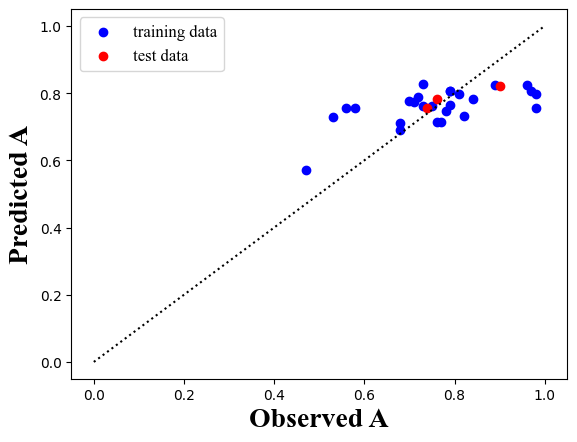

In [39]:
plt.scatter(y_train, y_pred_lasso_train, color='blue', label="training data")
plt.scatter(y_test, y_pred_lasso_test, color='red', label="test data")
plt.plot([0,1], [0,1], c="black", linestyle = "dotted")


plt.xlabel('Observed A', fontname="times new roman", fontsize=20, fontweight =1000)
plt.ylabel('Predicted A', fontname="times new roman", fontsize=20, fontweight =1000)
plt.legend(loc='upper left', prop = {"family" : "times new roman", "size": "large"})
plt.savefig('A_prediction.png', dpi=200)

In [15]:
#以下決定木

In [14]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(X_train)
X_train_st_dt = standard.transform(X_train)
X_test_st_dt = standard.transform(X_test)
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5,random_state = 0)
dt.fit(X_train_st_dt, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [15]:
from sklearn.metrics import r2_score

cv_dt = cross_val_score(estimator = dt, X = X_train_st_dt, y = y_train, cv = 10)

y_pred_dt_train = dt.predict(X_train_st_dt)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

y_pred_dt_test = dt.predict(X_test_st_dt)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  -206.35777637186976
R2_score (train):  0.8734003011536546
R2_score (test):  -0.007474307069449182
RMSE:  0.07144603900253588


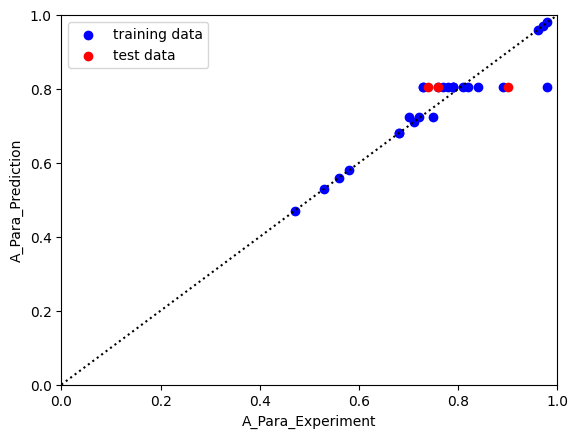

In [16]:
plt.scatter(y_train, y_pred_dt_train, color='blue', label='training data')
plt.scatter(y_test, y_pred_dt_test,  color='red', label='test data')
plt.plot([0,1], [0,1], color='black', linestyle='dotted')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('A_Para_Experiment')
plt.ylabel('A_Para_Prediction')
plt.legend()
plt.savefig('A_para_DT.png', dpi=200)

In [20]:
#以下ランダムフォレスト

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

standard = StandardScaler()
standard.fit(X_train)
X_train_st_rf = standard.transform(X_train)
X_test_st_rf = standard.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, max_depth=5, random_state = 0)
rf.fit(X_train_st_rf, y_train)
from sklearn.metrics import r2_score

cv_rf = cross_val_score(estimator=rf,X=X_train_st_rf,y=y_train,cv=10)

y_pred_rf_train = rf.predict(X_train_st_rf)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf.predict(X_test_st_rf)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  -186.70594899593345
R2_score (train):  0.8396905826182313
R2_score (test):  -0.06274219813852744
RMSE:  0.07337956439342319


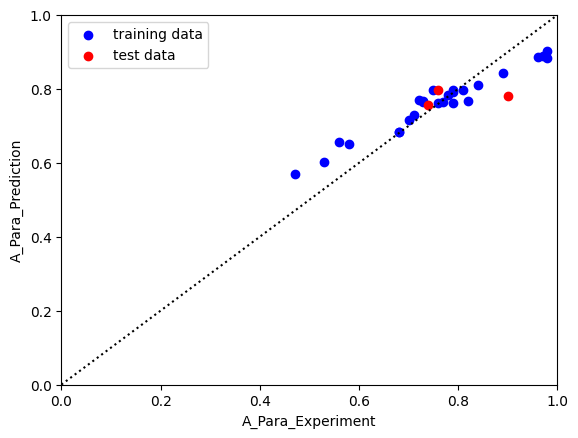

In [19]:
plt.scatter(y_train, y_pred_rf_train, label='training data', color='blue')
plt.scatter(y_test, y_pred_rf_test, color='red', label= 'test data')
plt.plot([0,1], [0,1], color='black', linestyle='dotted')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('A_Para_Experiment')
plt.ylabel('A_Para_Prediction')
plt.legend()
plt.savefig('A_para_RF.png', dpi=200)

In [20]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

standard = StandardScaler()
standard.fit(X_train)
X_train_st_sv = standard.transform(X_train)
X_test_st_sv = standard.transform(X_test)

svr = SVR(kernel='rbf', gamma=0.1, C=10)
svr_train = svr.fit(X_train_st_sv, y_train)

from sklearn.metrics import r2_score

cv_svr = cross_val_score(estimator=svr,X=X_train_st_sv,y=y_train,cv=10)

y_pred_svr_train = svr.predict(X_train_st_sv)
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_st_sv)
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  -273.40534315821463
R2_score (train):  0.6594123625122241
R2_score (test):  -0.4066585479047855
RMSE:  0.08442197567014714


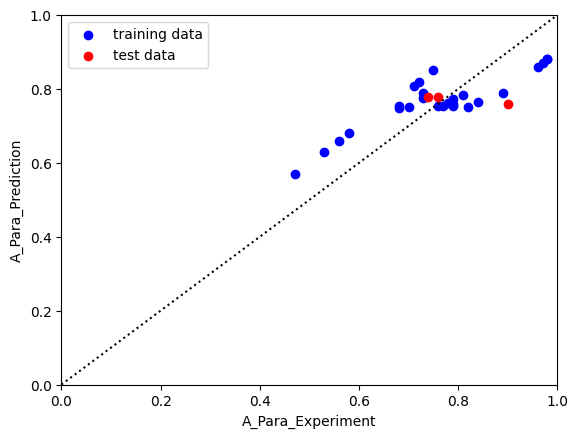

In [21]:
plt.scatter(y_train, y_pred_svr_train, label='training data', color='blue')
plt.scatter(y_test, y_pred_svr_test, color='red', label = 'test data')
plt.plot([0,1], [0,1], color='black', linestyle='dotted')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('A_Para_Experiment')
plt.ylabel('A_Para_Prediction')
plt.legend()
plt.savefig('A_para_SV.png', dpi=200)